# Unseen Classification Prediction Model
## On Breast Cancer Diagnosis
This data is from UCI on breast cancer. Using the classification model to predict unseen data and see how well it predicts the diagnosis value.
Imported the data from UCI, the credits are below. The data has no missing values, 31 features and 569 rows.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata credits
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information. Also shows no missing values.
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

## Importing libraries/ modules

In [2]:
import pandas as pd
import numpy as np

import requests

url = 'https://raw.githubusercontent.com/dolinger-nscc/user_defined_functions/main/udf.py' 
response = requests.get(url)

with open('udf.py', 'w') as file:
    file.write(response.text)
response.close()

import udf


### To create a dataframe, X and y are concatenate together

In [3]:
df=pd.concat([X,y], axis =1)
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


### Diagnosis (M = malignant = 1, B = benign = 0)

In [4]:
df.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

### Place dataframe to CSV for easier access to data, if needed.

In [50]:
#df.to_csv('./data/breast_cancer.csv', index= False)
#df= pd.read_csv('./data/breast_cancer.csv')
#df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


### Creating an unseen data set for predictions.

In [51]:
data, unseen =udf.gen_unseen_pct(data=df, frac=0.15, random_state=42)
df.shape, data.shape, unseen.shape

((569, 31), (484, 31), (85, 31))

### Using Pycaret classification experiment
1) Set up the experiment target is diagnosis on session id = 42
2) Train the model, then compare which model suits the data best.

In [52]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Diagnosis', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(484, 31)"
5,Transformed data shape,"(484, 31)"
6,Transformed train set shape,"(338, 31)"
7,Transformed test set shape,"(146, 31)"
8,Numeric features,30
9,Preprocess,True


In [53]:
s.train_transformed

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
150,13.000000,20.780001,83.510002,519.400024,0.11350,0.07589,0.031360,0.026450,0.2540,0.06087,...,24.110001,90.820000,616.700012,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435,0
190,14.220000,23.120001,94.370003,609.900024,0.10750,0.24130,0.198100,0.066180,0.2384,0.07542,...,37.180000,106.400002,762.400024,0.1533,0.93270,0.84880,0.17720,0.5166,0.14460,1
370,16.350000,23.290001,109.000000,840.400024,0.09742,0.14970,0.181100,0.087730,0.2175,0.06218,...,31.030001,129.300003,1165.000000,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614,1
340,14.420000,16.540001,94.150002,641.200012,0.09751,0.11390,0.080070,0.042230,0.1912,0.06412,...,21.510000,111.400002,862.099976,0.1294,0.33710,0.37550,0.14140,0.3053,0.08764,0
476,14.200000,20.530001,92.410004,618.400024,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,27.260000,112.099998,828.500000,0.1153,0.34290,0.25120,0.13390,0.2534,0.07858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,19.170000,24.799999,132.399994,1123.000000,0.09740,0.24580,0.206500,0.111800,0.2397,0.07800,...,29.940001,151.699997,1332.000000,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230,1
279,13.850000,15.180000,88.989998,587.400024,0.09516,0.07688,0.044790,0.037110,0.2110,0.05853,...,21.740000,98.370003,670.000000,0.1185,0.17240,0.14560,0.09993,0.2955,0.06912,0
309,13.050000,13.840000,82.709999,530.599976,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,17.400000,93.959999,672.400024,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580,0
18,19.809999,22.150000,130.000000,1260.000000,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.879999,186.800003,2398.000000,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,1


In [54]:
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9764,0.0000,0.9764,0.9781,0.9761,0.9489,0.9511,6.4940
ada,Ada Boost Classifier,0.9644,0.0000,0.9644,0.9677,0.9643,0.9240,0.9275,0.1020
et,Extra Trees Classifier,0.9616,0.0000,0.9616,0.9650,0.9612,0.9167,0.9209,0.0960
lightgbm,Light Gradient Boosting Machine,0.9615,0.0000,0.9615,0.9652,0.9611,0.9167,0.9212,0.1160
rf,Random Forest Classifier,0.9586,0.0000,0.9586,0.9610,0.9584,0.9110,0.9138,0.1470
ridge,Ridge Classifier,0.9558,0.0000,0.9558,0.9595,0.9550,0.9032,0.9085,0.0200
qda,Quadratic Discriminant Analysis,0.9558,0.0000,0.9558,0.9575,0.9559,0.9061,0.9076,0.0200
gbc,Gradient Boosting Classifier,0.9555,0.0000,0.9555,0.9583,0.9551,0.9035,0.9070,0.2190
lda,Linear Discriminant Analysis,0.9381,0.0000,0.9381,0.9435,0.9365,0.8623,0.8706,0.0200
lr,Logistic Regression,0.9322,0.0000,0.9322,0.9376,0.9315,0.8541,0.8605,0.1230


### Ada Boost Classifier is the best model 
So, using et the models create, tuned and finalized are made.

In [55]:
ada = s.create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9706,0.0000,0.9706,0.9719,0.9703,0.9344,0.9364
2,0.9412,0.0000,0.9412,0.9463,0.9401,0.8717,0.8790
3,0.9706,0.0000,0.9706,0.9719,0.9703,0.9368,0.9387
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9412,0.0000,0.9412,0.9490,0.9418,0.8790,0.8855
6,0.9412,0.0000,0.9412,0.9463,0.9401,0.8717,0.8790
7,0.9706,0.0000,0.9706,0.9719,0.9703,0.9368,0.9387
8,0.9697,0.0000,0.9697,0.9720,0.9699,0.9357,0.9376


In [56]:
tuned_ada =s.tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9706,0.0000,0.9706,0.9719,0.9703,0.9344,0.9364
2,0.9118,0.0000,0.9118,0.9228,0.9090,0.8046,0.8204
3,0.9412,0.0000,0.9412,0.9412,0.9412,0.8755,0.8755
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9706,0.0000,0.9706,0.9727,0.9708,0.9386,0.9404
6,0.9412,0.0000,0.9412,0.9463,0.9401,0.8717,0.8790
7,0.9412,0.0000,0.9412,0.9463,0.9401,0.8717,0.8790
8,0.9697,0.0000,0.9697,0.9720,0.9699,0.9357,0.9376


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [57]:
final_ada= s.finalize_model('ada')
final_ada

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['radius1', 'texture1',
                                             'perimeter1', 'area1',
                                             'smoothness1', 'compactness1',
                                             'concavity1', 'concave_points1',
                                             'symmetry1', 'fractal_dimension1',
                                             'radi...
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=42))],
         verbose=False)

### Evaluate models or plot models
Some models take time to create, so we can call the models we want like confusion matrix

In [58]:
s.evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

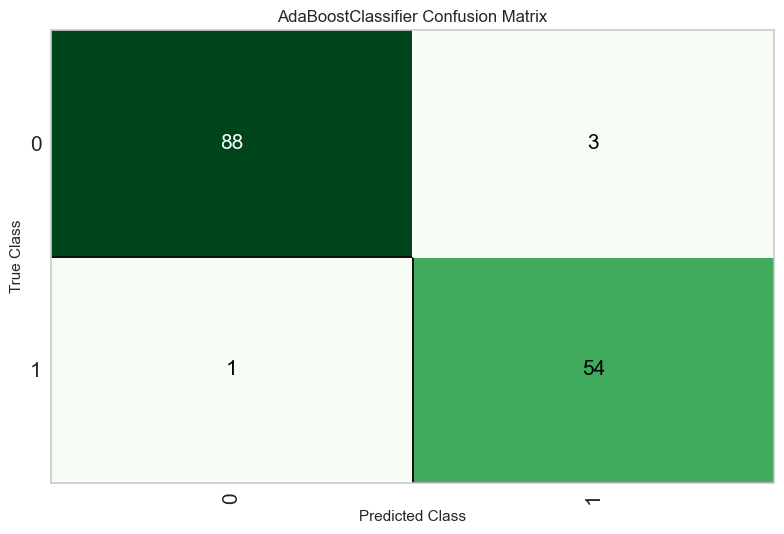

In [59]:
s.plot_model(tuned_ada, 'confusion_matrix')

### Let's start predicting!
We import matplotlib, seaborn and sklearn. With sklearn metrics we can get a classification report, accuracy score, precision score, recall score, and confusion matrix on unseen data.

In [60]:
#Pat went straight to predictions
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
cls = final_ada
unseen_X = unseen.drop(['Diagnosis'], axis = 1)
y_true = unseen['Diagnosis']

In [62]:
y_pred = cls.predict(unseen_X)
y_true, y_pred

(204    B
 70     M
 131    M
 431    B
 540    B
       ..
 132    M
 333    B
 86     M
 250    M
 274    M
 Name: Diagnosis, Length: 85, dtype: object,
 0     B
 1     M
 2     M
 3     B
 4     B
      ..
 80    M
 81    B
 82    M
 83    M
 84    M
 Name: Diagnosis, Length: 85, dtype: object)

In [63]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98        54
           M       0.97      0.97      0.97        31

    accuracy                           0.98        85
   macro avg       0.97      0.97      0.97        85
weighted avg       0.98      0.98      0.98        85



In [64]:
accuracy_score(y_true, y_pred)

0.9764705882352941

In [65]:
precision_score(y_true, y_pred, pos_label='B')

0.9814814814814815

In [66]:
recall_score(y_true, y_pred, pos_label = 'M')

0.967741935483871

In [67]:
cm=confusion_matrix(y_true, y_pred)
cm

array([[53,  1],
       [ 1, 30]], dtype=int64)

### To make the confusion matrix from seaborn heat map

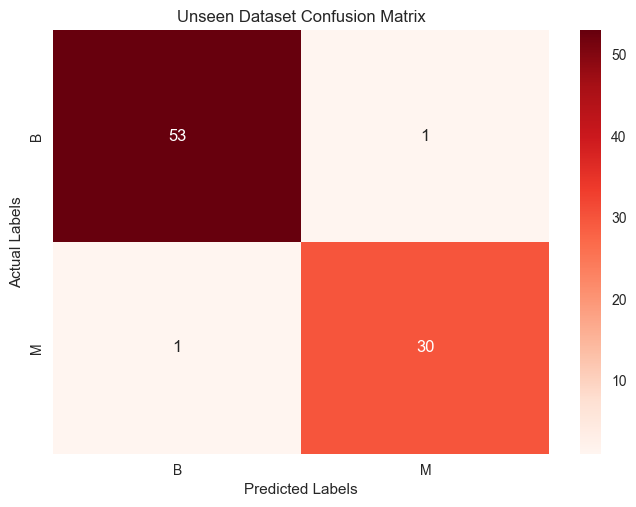

In [68]:
ax= sns.heatmap(cm, annot=True, cmap='Reds')
ax.set_xticklabels(['B', 'M'])
ax.set_yticklabels(['B', 'M'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Unseen Dataset Confusion Matrix');

In [69]:
#Double check if reading the confusion matrix correctly
df= pd.DataFrame({'Pred': y_pred, 'Actual': y_true})
df

,Pred,Actual
0,B,NaN
1,M,NaN
2,M,M
3,B,NaN
4,B,NaN
...,...,...
555,NaN,B
556,NaN,B
557,NaN,B
564,NaN,M


In [70]:
diff= df[df['Pred'] != df['Actual']]

In [71]:
diff['Pred'].value_counts()

Pred
B    50
M    23
Name: count, dtype: int64